

X.shape=(120, 1)
y_pred.shape=(120,)


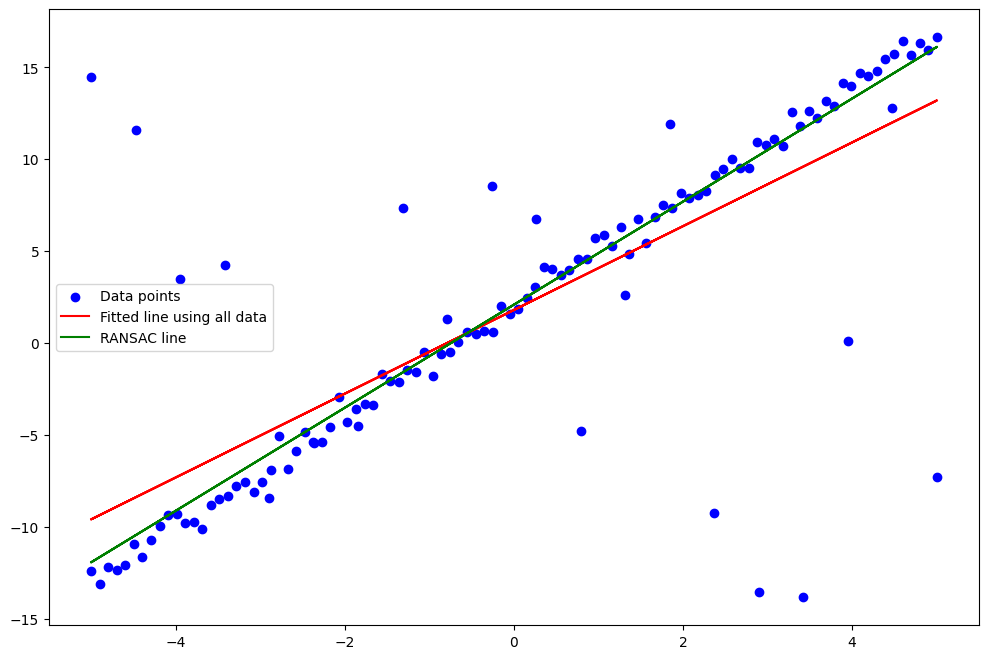

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generating 100 inliers
X_inliers = np.linspace(-5, 5, 100)
y_inliers = 3 * X_inliers + 2 + np.random.normal(0, 0.5, 100)

# Generating 20 outliers
X_outliers = np.linspace(-5, 5, 20)
y_outliers = 30 * (np.random.random(20) - 0.5)

# Concatenating inliers and outliers into one dataset
X = np.concatenate((X_inliers, X_outliers))
y = np.concatenate((y_inliers, y_outliers))

# Reshape X for model fitting
X = X.reshape(-1, 1)

# Model Fitting using all data

# Fit line using all data
model = LinearRegression()
model.fit(X, y)

# Predict y using the linear model with estimated coefficients
y_pred = model.predict(X)

print('\n')
print('X.shape={}'.format( X.shape))
print('y_pred.shape={}'.format(y_pred.shape))

# RANSAC algorithm

# For each iteration, we do the following:

# Randomly select a subset of the data of size sample_size. This forms our hypothetical inliers.
# Fit a LinearRegression model to these hypothetical inliers.
# Compute the residuals (the absolute differences between the observed and predicted values for all data points).

# Identify the inliers as those points for which the residual is less than the threshold t.
# If the number of inliers for the current model is more than any previous model, 
# we update our best model and the maximum inlier count.

# RANSAC
n_iterations = 100
n_samples = X.shape[0]
sample_size = int(n_samples * 0.6)
t = 0.1
best_model = None
best_inlier_num = 0

for _ in range(n_iterations):
    # select random samples 
    sample = np.random.choice(n_samples, sample_size)
    X_sample = X[sample]
    y_sample = y[sample]

    # fit model to the samples
    model_sample = LinearRegression().fit(X_sample, y_sample)
    y_sample_pred = model_sample.predict(X)

    # find inliers
    residuals = np.abs(y_sample_pred - y)
    inliers = residuals < t
    inlier_num = np.count_nonzero(inliers)

    # update the best model if the current one is better
    if inlier_num > best_inlier_num:
        best_inlier_num = inlier_num
        best_model = model_sample
        
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Fitted line using all data')

# Plotting RANSAC's best fitted line
y_pred_ransac = best_model.predict(X)
plt.plot(X, y_pred_ransac, color='green', label='RANSAC line')
plt.legend()
plt.show()        


# see also:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html?ref=localhost